In [1]:
import pycourse as pyc
import numpy as np
import matplotlib.pyplot as plt

### Setup

In [2]:

course=pyc.Course(name='Test Class',code='NATS0000',semester='Winter',year='2024')

In [3]:
scheme=pyc.GradingScheme(['iClicker','Assignment','Project','Exam']
                      ,weights=[10,10,30,50],ndrops=[1,0,0,0],nmisses=[0,0,0,0],reweighting=['internal','internal','external','external'])


In [4]:
#Instead of having the two exams equally weighted, an Exam Subscheme
#Allows for the best exam to be worth 30% and the worst exam to be worth 20%
scheme.add_subscheme('Exam',[30,20],optimize=True)

In [5]:
#Read in header of gradebook to find column number of each assessment
file=open('test_gradebook.csv','r')
header=file.readline().split(',')
for i,h in enumerate(header):
    print(i,h)
file.close()

0 ﻿First name
1 Last name
2 ID number
3 Email address
4 External tool: Office Hours Zoom Link - Fridays @ 12:30 pm (Real)
5 External tool: iClicker Lecture Quizzes (Real)
6 External tool: Lecture Recordings (Real)
7 iClicker Week 1 (Real)
8 iClicker Week 2 (Real)
9 iClicker Week 3 (Real)
10 iClicker Week 4 (Real)
11 iClicker Week 5 (Real)
12 iClicker Week 6 (Real)
13 iClicker Week 7 (Real)
14 iClicker Week 8 (Real)
15 iClicker Week 9 (Real)
16 iClicker Week 10 (Real)
17 iClicker Week 11 (Real)
18 iClicker Week 13 (Real)
19 iClicker Week 14 (Real)
20 iClicker Week 15 (Real)
21 iClicker Week 16 (Real)
22 iClicker Week 17 (Real)
23 iClicker Quizzes total (Real)
24 Quiz: Assignment 1 (Real)
25 Quiz: Assignment 2 (Real)
26 Quiz: Assignment 3 (Real)
27 Quiz: Assignment 4 (Real)
28 Quiz: Assignment 5 (Real)
29 Quiz: Assignment 7 (Real)
30 Quiz: Assignment 8 (Real)
31 Quiz: Assignment 9 (Real)
32 Quiz: Assignment 6 (Real)
33 Assignments total (Real)
34 Turnitin Assignment 2: Project 1: Do-it-y

In [6]:
#Read in full gradebook
gradebook=np.loadtxt('test_gradebook.csv',skiprows=1,dtype=str,delimiter=',')

In [7]:
#Add all of the students based on information in gradebook
course.add_students(gradebook[:,0],gradebook[:,1],gradebook[:,2],gradebook[:,3])

1

In [8]:
#Based on information from the header, manually add each assessment
#Note that first iClicker quiz is optional

nassess=1
for i in range(7,23):
    if nassess==1:
        course.add_assessment('iClicker',nassess,gradebook[:,i].tolist(),optional=True)
    else:
        course.add_assessment('iClicker',nassess,gradebook[:,i].tolist())
    nassess+=1

nassess=1
for i in [24,25,26,27,28,32,29,30,31]:
    course.add_assessment('Assignment',nassess,gradebook[:,i].tolist())
    nassess+=1

nassess=1
for i in [34,35,36]:
    course.add_assessment('Project',nassess,gradebook[:,i].tolist())
    nassess+=1

nassess=1
for i in [38,39]:
    course.add_assessment('Exam',nassess,gradebook[:,i].tolist())
    nassess+=1

In [9]:
#Sanity check to confirm what the course categories are
course.cat

array(['iClicker', 'Assignment', 'Project', 'Exam'], dtype='<U32')

In [10]:
#Sanity check to confirm which grade from the gradebook corresponds to what category
course.categories

array(['iClicker', 'iClicker', 'iClicker', 'iClicker', 'iClicker',
       'iClicker', 'iClicker', 'iClicker', 'iClicker', 'iClicker',
       'iClicker', 'iClicker', 'iClicker', 'iClicker', 'iClicker',
       'iClicker', 'Assignment', 'Assignment', 'Assignment', 'Assignment',
       'Assignment', 'Assignment', 'Assignment', 'Assignment',
       'Assignment', 'Project', 'Project', 'Project', 'Exam', 'Exam'],
      dtype='<U32')

In [11]:
#Add accomodation for Student 1 to drop lowest assignment using lastname
#as identifier
course.add_accomodation(lastname='1',category='Assignment',ndrops=1)

#Add accomodation for Student 2 to drop an additional iClicker using i_d
#as identifier
course.add_accomodation(i_d='2',category='iClicker',nmisses=1)

#Add accomodation for Student 3 to exclude Assignment 3 using email
#as identifier
course.add_accomodation(email='Student3@my.yorku.ca',category='Assignment',num=3)

In [12]:
course.calc_grades(scheme)

In [13]:
course.weights[3]

array([ 0.66666667,  0.66666667,  0.66666667,  0.66666667,  0.66666667,
        0.66666667,  0.66666667,  0.66666667,  0.66666667,  0.66666667,
        0.66666667,  0.66666667,  0.66666667,  0.66666667,  0.        ,
        0.66666667,  1.11111111,  1.11111111,  1.11111111,  1.11111111,
        1.11111111,  1.11111111,  1.11111111,  1.11111111,  1.11111111,
       10.        , 10.        , 10.        , 20.        , 30.        ])

In [14]:
course.grades[1]

array([  0.        ,  90.        , 100.        ,  83.33      ,
        87.5       , 100.        ,   0.        , 100.        ,
        75.        ,  90.        ,  90.        ,  14.29      ,
        40.        ,  80.        ,  91.67      ,  70.        ,
       100.        ,  85.71      ,  84.        ,  90.48      ,
        90.        ,  71.88      ,  94.12      ,  80.        ,
        73.33      ,   0.        ,  60.        ,   0.        ,
        58.        ,  66.81828088])

In [15]:
course.weights[0]

array([ 0.66666667,  0.66666667,  0.66666667,  0.66666667,  0.66666667,
        0.66666667,  0.66666667,  0.66666667,  0.66666667,  0.66666667,
        0.66666667,  0.66666667,  0.66666667,  0.        ,  0.66666667,
        0.66666667,  1.25      ,  1.25      ,  1.25      ,  1.25      ,
        1.25      ,  0.        ,  1.25      ,  1.25      ,  1.25      ,
       10.        , 10.        , 10.        , 30.        , 20.        ])

### Analysis

In [16]:
#Consider student1:
print('Student 1s grade in each assessment is: ',course.grades[0])
print('The default weighting scheme was: ',course.weights0)
print('The weightings used to calculate Student1s grade are: ',course.weights[0])

print('Student 1s final grade is :',course.final_grades[0])
print('Student 1s grades in each category are :',course.final_cat_grades[0])


Student 1s grade in each assessment is:  [ 50.          50.         100.          91.67       100.
  78.57       100.           0.         100.          80.
  90.           0.         100.           0.          91.67
  80.          80.95        71.43        92.          76.19
  95.           0.         100.          65.          80.
  88.          93.33         0.          36.          18.57432125]
The default weighting scheme was:  [ 0.625       0.625       0.625       0.625       0.625       0.625
  0.625       0.625       0.625       0.625       0.625       0.625
  0.625       0.625       0.625       0.625       1.11111111  1.11111111
  1.11111111  1.11111111  1.11111111  1.11111111  1.11111111  1.11111111
  1.11111111 10.         10.         10.         20.         30.        ]
The weightings used to calculate Student1s grade are:  [ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66

In [17]:
#Consider global properties
print('Average = ',np.mean(course.final_grades))
print('Median = ',np.median(course.final_grades))
print('STD = ',np.std(course.final_grades))

Average =  61.5496648318083
Median =  65.05933773513493
STD =  16.96484972982137


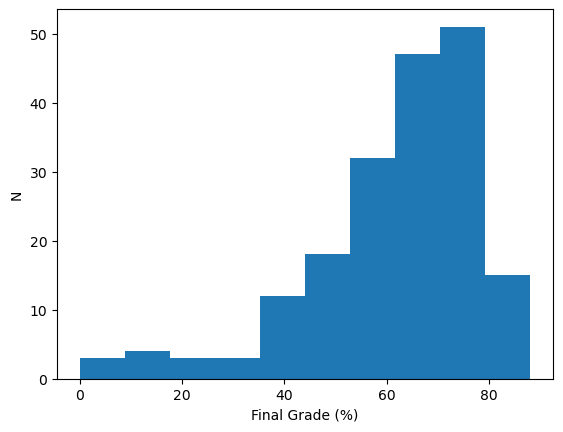

In [18]:
#Plot final grade distribution

plt.hist(course.final_grades)
plt.xlabel('Final Grade (%)')
plt.ylabel('N')
plt.show()
plt.close()

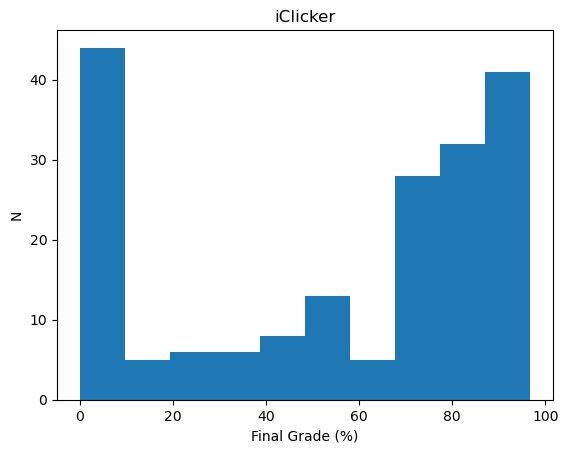

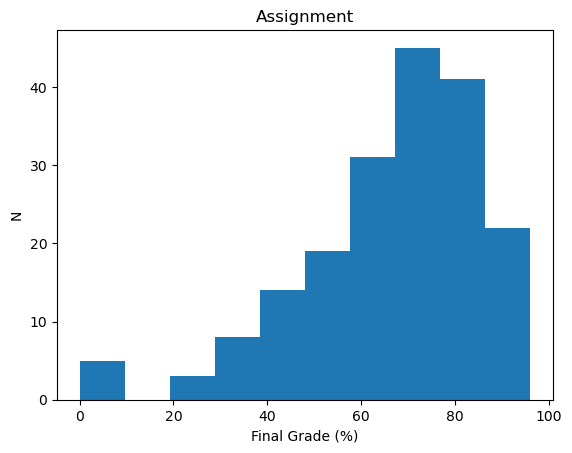

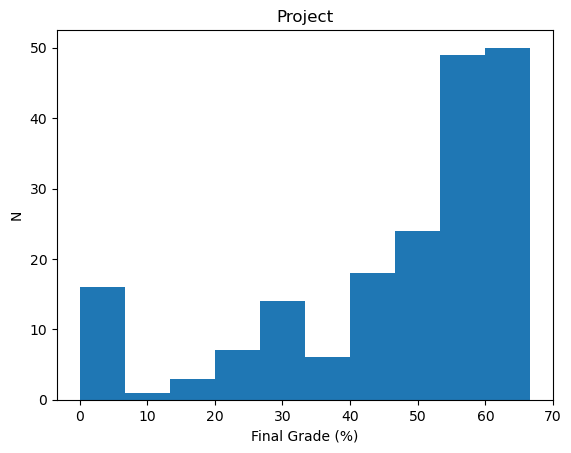

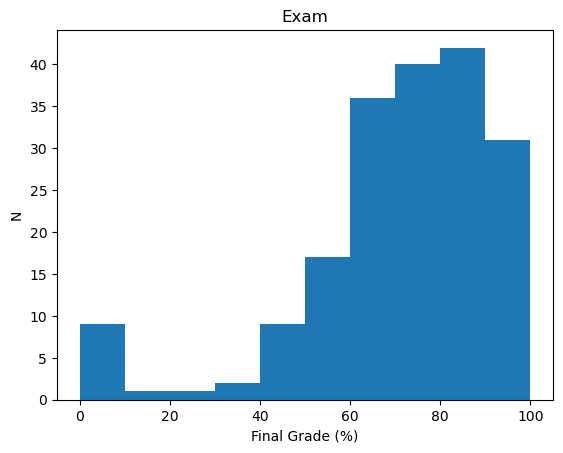

In [19]:
#Plot grade distribution in each category

for i in range(0,len(course.cat)):
    #Plot final grade distribution
    plt.hist(100.0*course.final_cat_grades[:,i]/scheme.weights[course.cat[i]])
    plt.xlabel('Final Grade (%)')
    plt.ylabel('N')
    plt.title(course.cat[i])
    plt.show()
    plt.close()

### Optimize Grades

In [20]:
scheme_1=pyc.GradingScheme(['iClicker','Assignment','Project','Exam']
                      ,weights=[10,10,30,50],ndrops=[1,0,0,0],nmisses=[0,0,0,0],reweighting=['internal','internal','external','external'])

scheme_2=pyc.GradingScheme(['iClicker','Assignment','Project','Exam']
                      ,weights=[10,10,20,40],ndrops=[0,0,0,0],nmisses=[1,1,1,1],reweighting=['internal','internal','external','external'])

scheme_3=pyc.GradingScheme(['iClicker','Assignment','Project','Exam']
                      ,weights=[20,20,20,20],ndrops=[1,1,0,0],nmisses=[0,0,0,0],reweighting=['internal','internal','external','external'])

In [21]:
course.optimize_grades([scheme_1,scheme_2,scheme_3])

In [22]:
#Consider student1:
print('Student 1s grade in each assessment is: ',course.grades[0])
print('The weightings used to calculate Student1s grade are: ',course.weights[0])

print('Student 1s final grade is :',course.final_grades[0])
print('Student 1s grades in each category are :',course.final_cat_grades[0])

Student 1s grade in each assessment is:  [ 50.          50.         100.          91.67       100.
  78.57       100.           0.         100.          80.
  90.           0.         100.           0.          91.67
  80.          80.95        71.43        92.          76.19
  95.           0.         100.          65.          80.
  88.          93.33         0.          36.          18.57432125]
The weightings used to calculate Student1s grade are:  [ 1.66666667  1.66666667  1.66666667  1.66666667  1.66666667  1.66666667
  1.66666667  1.66666667  1.66666667  1.66666667  1.66666667  1.66666667
  1.66666667  0.          1.66666667  1.66666667  3.57142857  3.57142857
  3.57142857  3.57142857  3.57142857  0.          3.57142857  0.
  3.57142857  8.33333333  8.33333333  8.33333333 12.5        12.5       ]
Student 1s final grade is : 61.73481396577382
Student 1s grades in each category are : [18.53183333 21.27035714 15.11083333  6.82179016]


In [23]:
#Consider global properties
print('Average = ',np.mean(course.final_grades))
print('Median = ',np.median(course.final_grades))
print('STD = ',np.std(course.final_grades))

Average =  68.21378861217607
Median =  72.11567693509198
STD =  17.728006063279437


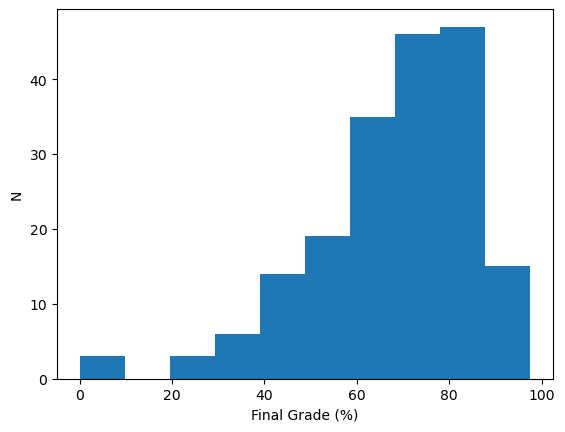

In [24]:
#Plot final grade distribution

plt.hist(course.final_grades)
plt.xlabel('Final Grade (%)')
plt.ylabel('N')
plt.show()
plt.close()

### Output

In [25]:
np.savetxt('final_grades.csv',np.column_stack([course.emails,course.final_grades]),fmt='%s',delimiter=',')

In [26]:
x=['a','b','c']

In [27]:
isinstance(x,str)

False

In [28]:
isinstance(x[0],str)

True